In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Налаштування для візуалізації
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.size'] = 12


#Перевірка статиcтичних гіпотез. Z-test.



0. Зчитайте дані з `data.csv` у змінну data, яка має тип pandas.DataFrame. Ми будемо далі працювати з цією змінною.

In [6]:
df = pd.read_csv("D:/Studing DATA/Model_python/data/statistical_hypothesis/statistical_hypothesis/data.csv")

In [9]:
print(df.head())

   Unnamed: 0       data
0           0  17.499453
1           1  19.662399
2           2   7.182823
3           3  29.841625
4           4   9.239386


Запустіть код нижче. Для коректної робити всіх подальших методів дані мають бути у вигляді одновимірного `numpy.ndarray` вектора та мати розмірність (100,). Така розмірність означає, що дані - одновимірні (колонка), якщо б розмірність була (100, 1), то дані сприймаються методами як двовимірні (таблиця), хоча для нас виглядати можуть так само.

In [8]:
data = df.data.values
data.shape

(100,)

In [10]:
print(df.head())

   Unnamed: 0       data
0           0  17.499453
1           1  19.662399
2           2   7.182823
3           3  29.841625
4           4   9.239386


**Завдання 1**. Зчитані дані - це сума покупок в доларах наших покупців на сайті протягом липня 2025 року.

До цього місяця, ми мали продажі в середньому на чек $20.

Необхідно зʼясувати, чи вийшло у нас статистично значущо **підвищити** середній чек за липень 2025?

Аби дати відповідь - ми проведемо z-test на рівні значущості $\alpha=0.05$ двома способами. В цьому завданні ми будемо виконувати обчислення "вручну" з використанням бібліотек numpy та scipy.stats подібно до прикладу в лекції. Для цього виконайте наступні 7 кроків. Правильне виконання кожного з кроків оцінюється в 1 бал.

1. Запишіть параметри задачі у змінні Python:
    - `sample_mean` - $\bar{x}$, середнє значення в вибірці
    - `population_mean` - $\mu_0$, середнє значення в популяції (тобто те, з яким ми порівнюємо середнє вибіркове значення)
    - `population_std` - $\sigma$, вибіркове стандартне відхилення, яке ми вважаємо, що є рівним ст. відх. популяції, адже маємо достатньо велику вибірку.
    - `sample_size` - $n$, розмір вибірки
    - `alpha` - $\alpha$ рівень значущості
    
    **Увага!** Для обчислення стандартного відхилення маємо скористатись функцією `np.std(your_dataframe, ddof=1)`. Чому так - розбираємо в лекції про t-test.



In [16]:
sample_mean = df["data"].mean()    
population_mean = 20    
population_std = np.std(df.data, ddof=1)     
sample_size = 100  
alpha = 0.05 

In [14]:
population_std

np.float64(6.25356123240434)

In [17]:
sample_mean

np.float64(19.37755319670441)

2. Визначте для цієї задачі:
    - якою є гіпотеза $H_0$
    - якою є альтернативна гіпотеза $H_a$
    - з яким типом тесту ми маємо справу - лівосторонній, правосторонній чи двосторонній.

 **Гіпотеза**   

H₀: μ = 20 $ 

H₁: μ > 20 $  

Тип тесту: правосторонній (one-tailed)


3. Обчисліть стандартну помилку SE.
4. Розрахуйте z-статистику.
5. Знайдіть критичне z-значення з допомогою бібліотеки stats.
6. Обчисліть p-value з допомогою бібліотеки stats.
7. Прийміть рішення, чи відхиляєте ви гіпотезу $H_0$. Для прийняття рішення зробіть і порівняння z-статистики з критичним значенням, і проаналізуйте p-value.

In [24]:
 # Формула: SE = σ / √n
standard_error = population_std / np.sqrt(sample_size)
print(f"SE = {standard_error:.3f}")
print("Інтерпретація: В середньому, вибіркове середнє відхиляється")
print(f"від справжнього середнього на ±{standard_error:.3f} балів IQ")

SE = 0.625
Інтерпретація: В середньому, вибіркове середнє відхиляється
від справжнього середнього на ±0.625 балів IQ


In [23]:
# Формула: z = (x̄ - μ₀) / SE
z_statistic = (sample_mean - population_mean) / standard_error
print(f"z = {z_statistic:.3f}")

if z_statistic > 2:
    print("Це досить велике відхилення. (більше 2 стандартних помилок)")
elif z_statistic > 1:
    print("Це помірне відхилення (між 1 та 2 стандартними помилками)")
else:
    print("Це невелике відхилення (менше 1 стандартної помилки)")

z = -0.995
Це невелике відхилення (менше 1 стандартної помилки)


In [26]:
# Для правостороннього тесту з α = 0.05
z_critical = stats.norm.ppf(1 - alpha)

print(f"Критичне z-значення = {z_critical:.3f}")


Критичне z-значення = 1.645


In [29]:
# Для правостороннього тесту: p-value = P(Z > z_statistic)
p_value = 1 - stats.norm.cdf(z_statistic)
print(f"Випадково отримати це значення ≥ {sample_mean} становить {p_value:.6f}")
print(f"або приблизно {p_value*100:.4f}%")
print()
if p_value < 0.001:
    print("Це НАДЗВИЧАЙНО малоймовірно! (менше 0.1%)")
elif p_value < 0.01:
    print("Це дуже малоймовірно! (менше 1%)")
elif p_value < 0.05:
    print("Це малоймовірно! (менше 5%)")
else:
    print("Це цілком можливо випадково")

Випадково отримати це значення ≥ 19.37755319670441 становить 0.840216
або приблизно 84.0216%

Це цілком можливо випадково


 При $Zкр.> Zстат.$  і $p > \alpha$  ми не відхиляємо $H_0$. 

**Завдання 2.** Виконайте обчислення z-test з використанням бібліотеки statsmodels.

Отримайте z-статистику та р-значення.

Виведіть p-значення та зробіть висновок, чи ми маємо достатньо доказів, аби стверджувати, що середній чек зріс.

Чи зійшлись значення z-статистику та р-значення в цьому завданні з попередніми обчисленнями?

Завдання оцінюється в 3 бали.

In [30]:
print(f"z-статистика = {z_statistic:.3f}")
print(f"Критичне значення = {z_critical:.3f}")
print(f"Порівняння: {z_statistic:.3f} {'>' if z_statistic > z_critical else '≤'} {z_critical:.3f}")

if z_statistic > z_critical:
    print("Висновок: z-статистика ПЕРЕВИЩУЄ критичне значення")
    decision1 = "ВІДХИЛЯЄМО H₀"
else:
    print("Висновок: z-статистика НЕ перевищує критичне значення")
    decision1 = "НЕ ВІДХИЛЯЄМО H₀"

print(f"Рішення: {decision1}")

z-статистика = -0.995
Критичне значення = 1.645
Порівняння: -0.995 ≤ 1.645
Висновок: z-статистика НЕ перевищує критичне значення
Рішення: НЕ ВІДХИЛЯЄМО H₀


In [31]:
print(f"p-value = {p_value:.6f}")
print(f"Рівень значущості α = {alpha}")
print(f"Порівняння: {p_value:.6f} {'<' if p_value < alpha else '≥'} {alpha}")

if p_value < alpha:
    print("Висновок: p-value МЕНШЕ за рівень значущості")
    decision2 = "ВІДХИЛЯЄМО H₀"
else:
    print("Висновок: p-value НЕ менше за рівень значущості")
    decision2 = "НЕ ВІДХИЛЯЄМО H₀"

print(f"Рішення: {decision2}")

p-value = 0.840216
Рівень значущості α = 0.05
Порівняння: 0.840216 ≥ 0.05
Висновок: p-value НЕ менше за рівень значущості
Рішення: НЕ ВІДХИЛЯЄМО H₀


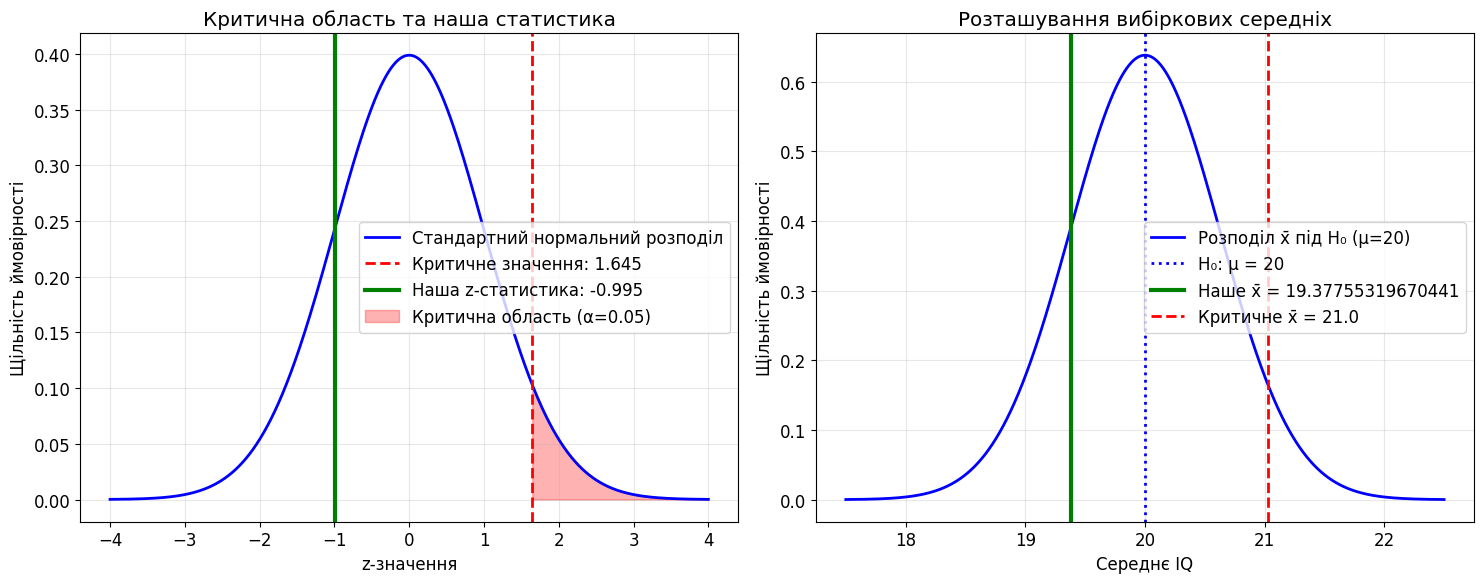

In [32]:
# Створюємо детальну візуалізацію
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Підготовка даних для графіків
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, 0, 1)

# Графік 1: Критична область
ax1 = axes[0]
ax1.plot(x, y, 'b-', linewidth=2, label='Стандартний нормальний розподіл')
ax1.axvline(z_critical, color='red', linestyle='--', linewidth=2,
            label=f'Критичне значення: {z_critical:.3f}')
ax1.axvline(z_statistic, color='green', linestyle='-', linewidth=3,
            label=f'Наша z-статистика: {z_statistic:.3f}')

# Заливаємо критичну область
x_crit = x[x >= z_critical]
y_crit = stats.norm.pdf(x_crit, 0, 1)
ax1.fill_between(x_crit, y_crit, alpha=0.3, color='red',
                  label=f'Критична область (α={alpha})')

ax1.set_xlabel('z-значення')
ax1.set_ylabel('Щільність ймовірності')
ax1.set_title('Критична область та наша статистика')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Графік 2: P-value
ax2 = axes[1]
x_means = np.linspace(population_mean - 4*standard_error,
                      population_mean + 4*standard_error, 1000)
y_means = stats.norm.pdf(x_means, population_mean, standard_error)
ax2.plot(x_means, y_means, 'b-', linewidth=2,
         label=f'Розподіл x̄ під H₀ (μ={population_mean})')
ax2.axvline(population_mean, color='blue', linestyle=':', linewidth=2,
            label=f'H₀: μ = {population_mean}')
ax2.axvline(sample_mean, color='green', linestyle='-', linewidth=3,
            label=f'Наше x̄ = {sample_mean}')

# Критичне значення в термінах IQ
critical_iq = population_mean + z_critical * standard_error
ax2.axvline(critical_iq, color='red', linestyle='--', linewidth=2,
            label=f'Критичне x̄ = {critical_iq:.1f}')

ax2.set_xlabel('Середнє IQ')
ax2.set_ylabel('Щільність ймовірності')
ax2.set_title('Розташування вибіркових середніх')
ax2.legend()
ax2.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()